In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Figure 4

In [2]:
#Update to local path for experiment1 csv
df =pd.read_csv('C:\\Users\\bisho\\Documents\\ECN5050\\ECN5050-Replication-Project\\experiment1_data.csv')
plt.style.use('grayscale')


# Map treatment labels
treatment_labels = {1: "T1", 2: "T2", 3: "T3", 5: "T4"}
df["treatment"].replace(treatment_labels, inplace=True)

# Filter data
df = df[df["treatment"].isin(["T1", "T2", "T3", "T4"])]

# Modify belief1 values based on treatment
df.loc[df["treatment"] == "T2", "belief1"] -= 20
df.loc[df["treatment"].isin(["T1", "T3", "T4"]), "belief1"] -= 40

# Calculate means and standard errors
result = df.groupby("treatment").agg(
    m_belief1=("belief1", "mean"),
    m_frac_correct_land=("frac_correct_land", "mean"),
    sem_belief1=("belief1", "sem"),
    sem_frac_correct_land=("frac_correct_land", "sem")
).reset_index()


## Figure 4.A

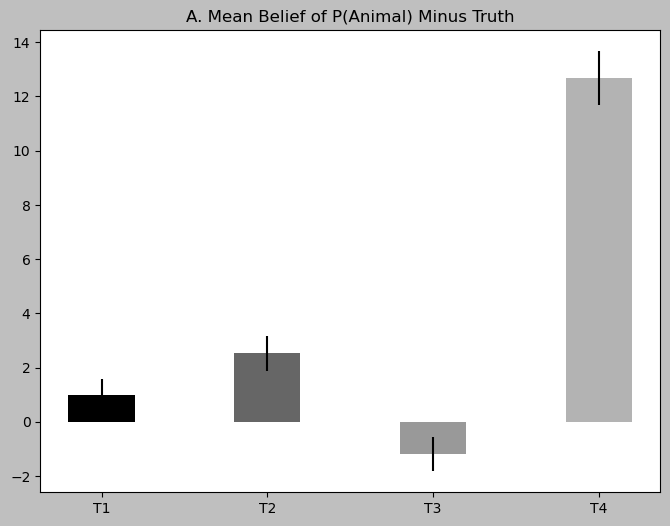

In [3]:
# Plot Figure 4 Panel A
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.4

for i, treatment in enumerate(result["treatment"]):
    subset = result[result["treatment"] == treatment]
    ax.bar(i, subset["m_belief1"], yerr=subset["sem_belief1"],
            width=width, label=treatment)

# Customize the plot
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result["treatment"])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("A. Mean Belief of P(Animal) Minus Truth")

# Save the plot
plt.show()

## Figure 4.B

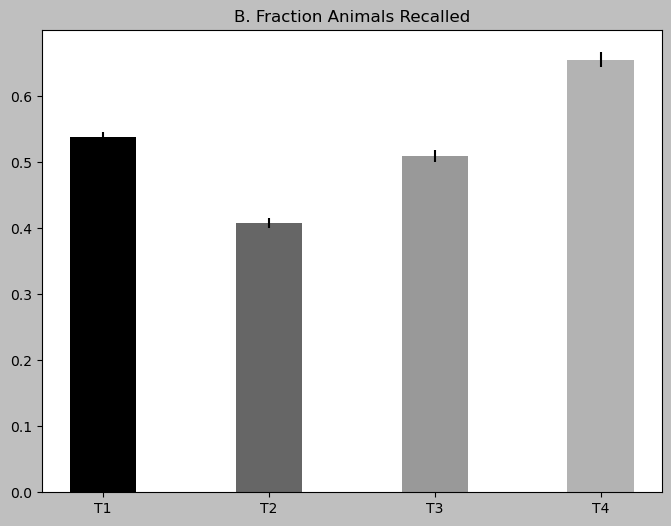

In [4]:
# Plot Figure 4 Panel B
fig, ax = plt.subplots(figsize=(8, 6))

for i, treatment in enumerate(result["treatment"]):
    subset = result[result["treatment"] == treatment]
    ax.bar(i, subset["m_frac_correct_land"], yerr=subset["sem_frac_correct_land"],
            width=width, label=treatment)

# Customize the plot
ax.set_xticks(range(len(result)))
ax.set_xticklabels(result["treatment"])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("B. Fraction Animals Recalled")

# Save the plot
plt.show()

# Figure 5

In [5]:
#Update to local path for experiment1 csv
df =pd.read_csv('C:\\Users\\bisho\\Documents\\ECN5050\\ECN5050-Replication-Project\\experiment2_data.csv')
treatment_labels = {3: "NL", 2: "NM", 1: "NH", 8: "IL", 7: 'IH', 6: 'CL', 5: 'CM', 4: 'CH'}
df["treatment"].replace(treatment_labels, inplace=True)

df = df[df["treatment"].isin(["NL", "NM", "NH", "IL", 'IH', 'CL', 'CM', 'CH'])]

#Calculate means and standard erros
result = df.groupby("treatment").agg(
    m_posteriors1=("posteriors1", "mean"),
    m_posteriors2=("posteriors2", "mean"),
    sem_posteriors1=("posteriors1", "sem"),
    m_recall=("recall_num_orange", "mean"),
    sem_recall=("recall_num_orange", "sem")
).reset_index()

result.loc[result["treatment"].isin(["NL", "NM", "NH"]), "m_posteriors1"] -= 50
result.loc[result["treatment"].isin(["IL", "IH"]), "m_posteriors1"] -= 55
result.loc[result["treatment"].isin(["CL", "CM", "CH"]), "m_posteriors1"] -= 70

## Figure 5.A

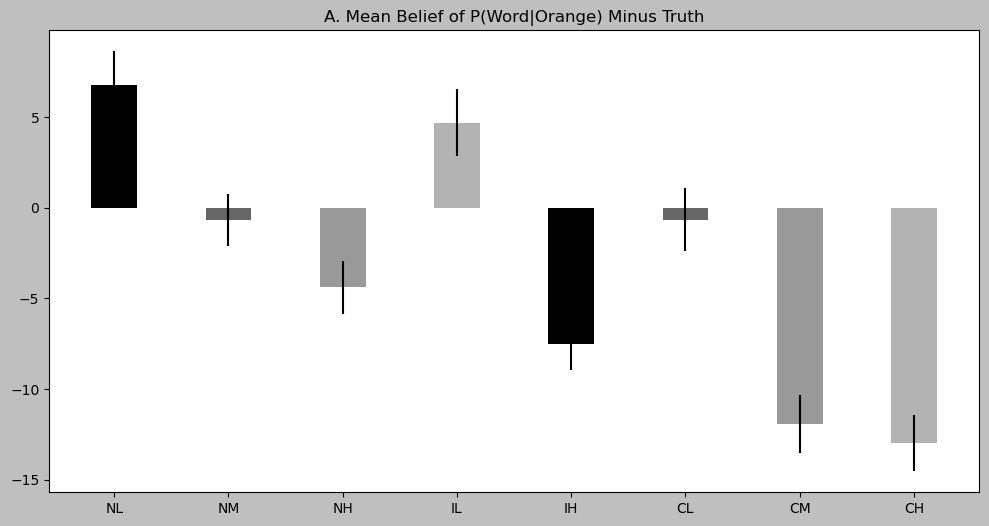

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, treatment in enumerate(["NL", "NM", "NH", "IL", 'IH', 'CL', 'CM', 'CH']):
    subset = result[result["treatment"] == treatment]
    ax.bar(i, subset["m_posteriors1"], yerr=subset["sem_posteriors1"],
            width=width, label=treatment)

# Customize the plot
ax.set_xticks(range(len(result)))
ax.set_xticklabels(["NL", "NM", "NH", "IL", 'IH', 'CL', 'CM', 'CH'])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("A. Mean Belief of P(Word|Orange) Minus Truth")

# Save the plot
plt.show()



## Figure 5.B

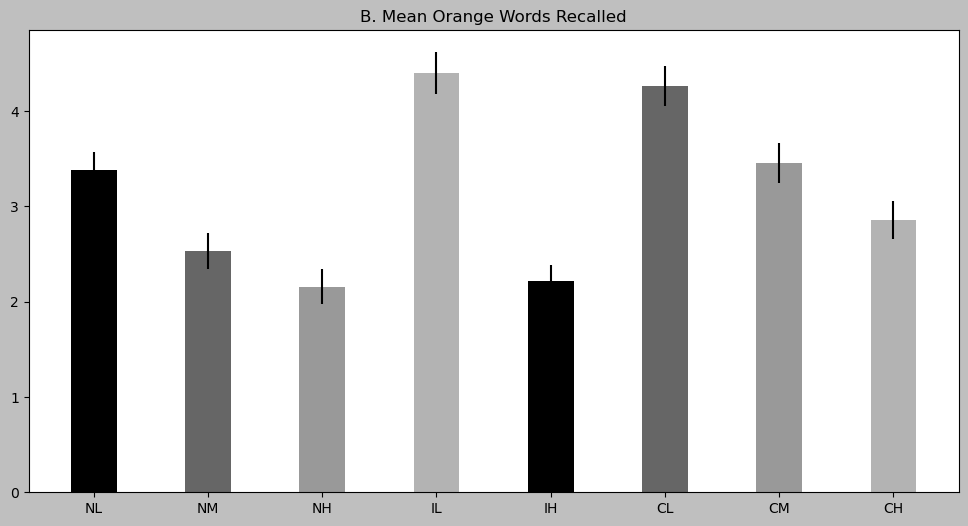

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, treatment in enumerate(["NL", "NM", "NH", "IL", 'IH', 'CL', 'CM', 'CH']):
    subset = result[result["treatment"] == treatment]
    ax.bar(i, subset["m_recall"], yerr=subset["sem_recall"],
            width=width, label=treatment)

# Customize the plot
ax.set_xticks(range(len(result)))
ax.set_xticklabels(["NL", "NM", "NH", "IL", 'IH', 'CL', 'CM', 'CH'])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("B. Mean Orange Words Recalled")

# Save the plot
plt.show()